In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib
from pandas.plotting import scatter_matrix
from datetime import datetime, timedelta
from scipy.stats import shapiro, pearsonr

## Traffic jams,alerts,wazers - Statistics

Traffic jams groupby datum a hours, spojení s "kalendářem" 13.7.-8.10.2020

vytvoření kalendáře

In [21]:
base = datetime.strptime('2020-07-13 00:00:00', '%Y-%m-%d %H:%M:%S')
date_list = [base + timedelta(hours=x) for x in range(2103)]

In [22]:
calendar = pd.DataFrame(date_list, columns = ['dateTime'])

In [23]:
def date(vstup):
    return vstup.date()

In [24]:
def hour(vstup):
    return vstup.hour

In [25]:
calendar['datum'] = calendar['dateTime'].apply(date)
calendar['hour'] = calendar['dateTime'].apply(hour)
calendar

,dateTime,datum,hour
0,2020-07-13 00:00:00,2020-07-13,0
1,2020-07-13 01:00:00,2020-07-13,1
2,2020-07-13 02:00:00,2020-07-13,2
3,2020-07-13 03:00:00,2020-07-13,3
4,2020-07-13 04:00:00,2020-07-13,4
...,...,...,...
2098,2020-10-08 10:00:00,2020-10-08,10
2099,2020-10-08 11:00:00,2020-10-08,11
2100,2020-10-08 12:00:00,2020-10-08,12
2101,2020-10-08 13:00:00,2020-10-08,13


In [27]:
jamsGroupDf = pd.read_csv('jamsGroupDf.csv', encoding = 'UTF-8')

In [29]:
alertsGroupDf = pd.read_csv('alertsGroupDfh.csv', encoding = 'UTF-8')

In [30]:
maxWazers = pd.read_csv('maxWazersh.csv', encoding = 'UTF-8')

In [31]:
jamsGroupDf['datum'] = pd.to_datetime(jamsGroupDf['datum']).apply(date)
jamsGroupDf = jamsGroupDf.rename(columns={'hours':'hour', 'uuid':'jamsCount'})

In [32]:
alertsGroupDf['datum'] = pd.to_datetime(alertsGroupDf['datum']).apply(date)
alertsGroupDf = alertsGroupDf.rename(columns={'hours':'hour', 'alertID':'alertsCount'})

In [33]:
maxWazers['datum']=pd.to_datetime(maxWazers['datum'])

In [34]:
calendarDf = calendar.merge(jamsGroupDf, how = 'left', on = ['datum','hour']).merge(alertsGroupDf, how = 'left', on =['datum','hour'])

In [36]:
calendarDf['datum']=pd.to_datetime(calendarDf['datum'])

In [37]:
jAwDf = pd.merge(calendarDf,maxWazers,how='left', on = ['datum','hour'])

In [41]:
jAwDf['jamsCount'] = jAwDf['jamsCount'].fillna(0)
jAwDf['alertsCount'] = jAwDf['alertsCount'].fillna(0) 

In [42]:
jAwDf.head()

,dateTime,datum,hour,jamsCount,alertsCount,wazers
0,2020-07-13 00:00:00,2020-07-13,0,0.0,0.0,153.0
1,2020-07-13 01:00:00,2020-07-13,1,0.0,0.0,67.0
2,2020-07-13 02:00:00,2020-07-13,2,0.0,0.0,63.0
3,2020-07-13 03:00:00,2020-07-13,3,0.0,0.0,88.0
4,2020-07-13 04:00:00,2020-07-13,4,142.0,0.0,118.0


In [43]:
jAwDf.describe()

,hour,jamsCount,alertsCount,wazers
count,2103.000000,2103.000000,2103.000000,1826.000000
mean,11.467903,48.550642,37.314313,1200.617196
std,6.919119,53.492881,52.775115,926.031038
min,0.000000,0.000000,0.000000,37.000000
25%,5.000000,7.000000,3.000000,234.500000
50%,11.000000,26.000000,15.000000,1242.000000
75%,17.000000,76.000000,51.000000,1913.750000
max,23.000000,412.000000,403.000000,4598.000000


test normálního rozdělení

In [43]:
shapiro(jAwDf['jamsCount'])

ShapiroResult(statistic=0.820752739906311, pvalue=1.821688003622262e-43)

In [44]:
shapiro(jAwDf['alertsCount'])

ShapiroResult(statistic=0.7109220623970032, pvalue=0.0)

výpočet korelace

In [46]:
jAwDf.corr(method="spearman")

,hour,jamsCount,alertsCount,wazers
hour,1.000000,0.296190,0.264882,0.360351
jamsCount,0.296190,1.000000,0.908698,0.877843
alertsCount,0.264882,0.908698,1.000000,0.914254
wazers,0.360351,0.877843,0.914254,1.000000


histogramy a bodové grafy

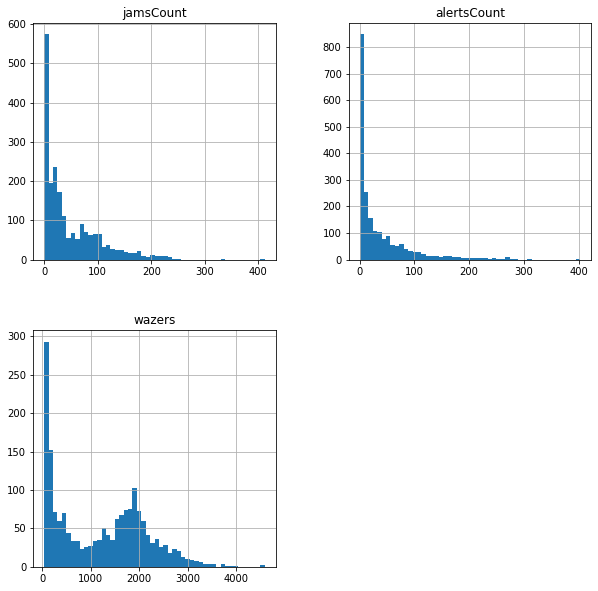

In [53]:
jAwDf.hist(column = ['jamsCount','alertsCount','wazers'],bins = 50,figsize = (10,10));

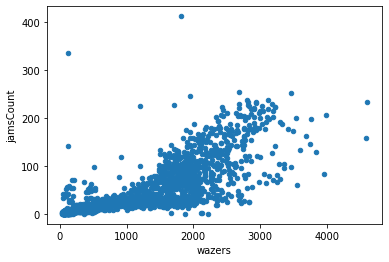

In [51]:
jAwDf.plot.scatter(x="wazers", y="jamsCount");

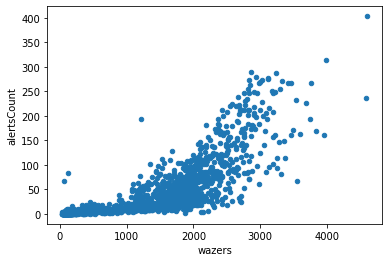

In [40]:
jAwDf.plot.scatter(x="wazers", y="alertsCount");

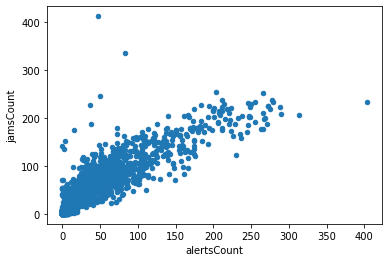

In [41]:
jAwDf.plot.scatter(x="alertsCount", y="jamsCount");

rozdělení dat na den (16h) a noc(8h)

In [54]:
dayPart = []
for i in range(0,len(jAwDf['hour'])):
    if jAwDf['hour'][i] in (22,23,0,1,2,3,4,5):
        dayPart.append(8)
    else:
        dayPart.append(16)

In [55]:
jAwDf['dayPart']= dayPart

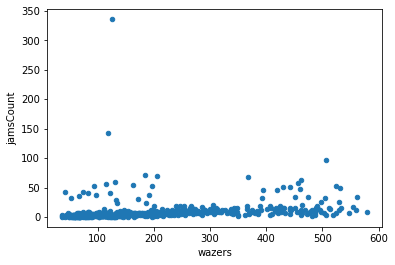

In [58]:
jAwDf[jAwDf['dayPart']==8].plot.scatter(x="wazers", y="jamsCount");

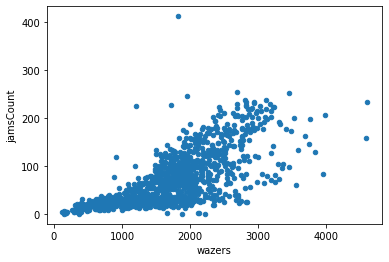

In [59]:
jAwDf[jAwDf['dayPart']==16].plot.scatter(x="wazers", y="jamsCount");